<a href="https://colab.research.google.com/github/farzin23i/PyML-SpringSchool2021/blob/main/Workshop1/PMLSC11_210325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Links to see more references

project euler for algorihtm problems <br>
https://projecteuler.net/archives

Every python tutorial could be good. The better is what you are more comfortable with. <br>
This site with its youtube channel is a good suggestion: <br>
https://pythonprogramming.net/python-fundamental-tutorials/

# Some statistics about you

How to plot a pie chart: <br>
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

In [ ]:
import pylab as plt

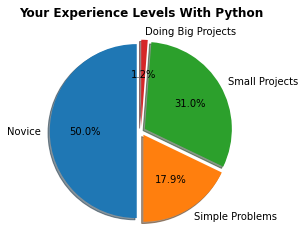

In [ ]:
sizes = [42, 15, 26, 1]
explode = [0.05, 0.05, 0.05, 0.05]
labels = ['Novice', 'Simple Problems', 'Small Projects', 'Doing Big Projects']
plt.pie (sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90);
plt.title ('Your Experience Levels With Python', weight='bold')

plt.show()

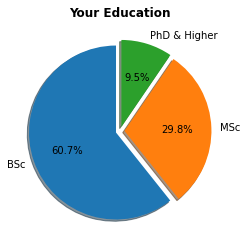

In [ ]:
labels = ['BSc', 'MSc', 'PhD & Higher']
sizes = [51, 25, 8]
explode = [0.05, 0.05, 0.05]
plt.pie (sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90);
plt.title ('Your Education', weight='bold')

plt.show()

## Learning Curves

How to read image in notebook from url

In [ ]:
from PIL import Image
import requests

url = 'https://www.valamis.com/documents/10197/520324/learning-curve.png'
im = Image.open(requests.get(url, stream=True).raw, )

[]

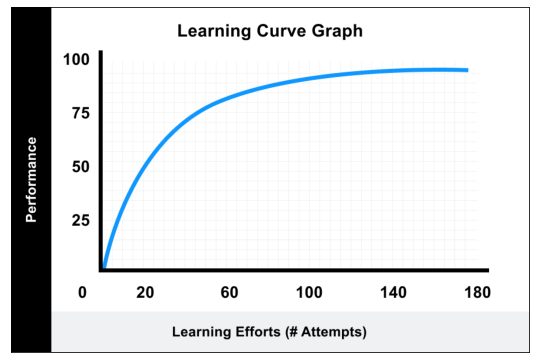

In [ ]:
# Create Figure (empty canvas)
fig = plt.figure(figsize= [10,6])

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.grid()
axes.imshow (im)
axes.set_xticks ([])
axes.set_yticks ([])

# Projectile Motion

In [ ]:
import numpy as np 
import pylab as plt 
from numpy import sin, cos, pi

In [ ]:
plt.style.use ('seaborn')       # To change the style of plots.

## Simple projectile

In [ ]:
# Initialize some variables 
g= 10
v0 = 5
theta0 = pi/6
x0 = 1
y0 = 5

In [ ]:
# Define a function with multiple outputs to calculte 
def COOs(t, theta):
    X_out = v0*cos(theta)*t + x0
    Y_out = -.5*g*t**2 + v0*sin(theta)*t + y0
    return X_out, Y_out

In [ ]:
# To test & unpack the function outputs
R = COOs(0, pi/6)
x_t= R[0]
y_t= R[1]
print (x_t, y_t)

1.0 5.0


In [ ]:
T = np.linspace (0, 5, 40)          # an array of 40 numbers with equal distance between 0 & 5
thetas = [pi/3, pi/6, pi/8]         # 3 number for initial angle 

# 2D arrays to archive Coordinates of projectile motion for each angle
X_th= np.zeros ([3, len(T)])
Y_th= np.zeros ([3, len(T)])

for i, thet in enumerate (thetas):
    # print (i, thet)
    X_th[i], Y_th[i]= COOs (T, thet)

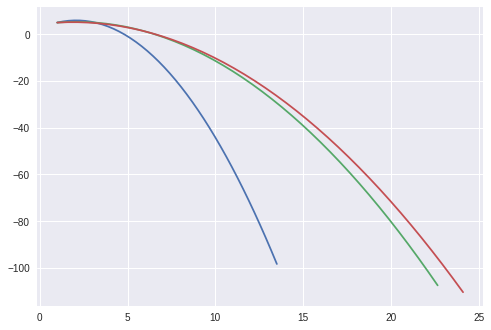

In [ ]:
plt.plot (X_th.T, Y_th.T)
# plt.plot (X_th[0], Y_th[0])
# plt.plot (X_th[1], Y_th[1])
# plt.plot (X_th[2], Y_th[2])

In [ ]:
# Note on how append works in python :
zz= []
for i in range (10):
    zz.append (i)
    print (zz)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


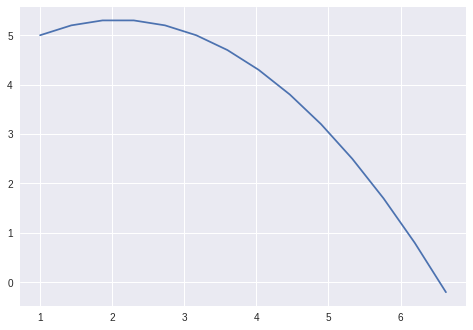

In [ ]:
# from now on the projectile goes until reach the surface with Y=0; we only need to check that in each step y is more than 0.
X, Y= [], []        # define two emty lists to capture the coordinates in each step.
t = 0               # initial time
dt = 0.1            # time step
y = y0              # 
while y > 0:
    x, y = COOs (t, theta0)
    X.append (x)
    Y.append (y)
    t += dt
plt.plot (X, Y)

## Let's go out in Wind

In [ ]:
# Now we suppose there is wind. Consider this with a positive random number that is added to each COOs in each step.
def COOs_windy (t, theta):
    X_out = v0*cos(theta)*t + x0
    Y_out = -.5*g*t**2 + v0*sin(theta)*t + y0
    return [X_out, Y_out] + np.random.random (size=2)

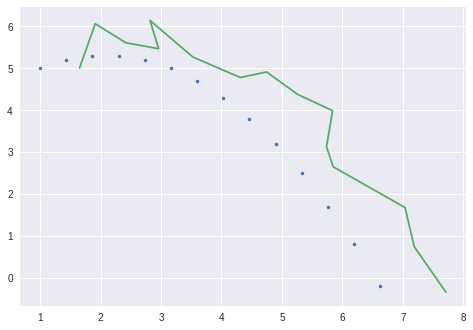

In [ ]:
X1= []
Y1= []
t = 0
dt = 0.1
y = y0
while y > 0:
    x, y = COOs_windy (t= t, theta=theta0)
    X1.append (x)
    Y1.append (y)
    t += dt

plt.plot (X, Y, '.')
plt.plot (X1, Y1, )

But this is not a real wind. The problems are that: <br>
<ol>
<li>The random numbers are not normally distributed as in real world it is. </li>
<li>The next step is not calculated depending on coordinates, where we are located now.</li>
</ol>

### Notes on Randomness

Text(0.5, 1.0, 'A Normal Distibution')

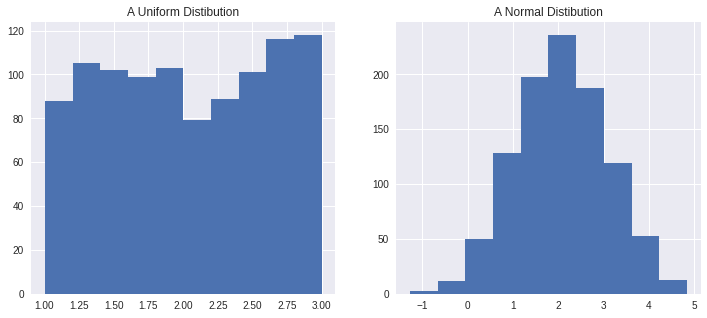

In [ ]:
R1 = np.random.random (1000)*2 + 1
R2 = np.random.normal (loc=2, scale=1, size= 1000)

fig, (ax1, ax2) = plt.subplots (1, 2, figsize= (12, 5))
ax1.hist (R1);
ax2.hist (R2)

ax1.set_title ('A Uniform Distibution')
ax2.set_title ('A Normal Distibution')

### Simulate the storm by randoms

In [ ]:
# For using the normal distibution for our random winds, we need a bag of them. 
# Remember the example of 90 blue and 10 red balls in a bag. in each choice the probability of being blue is 0.9
wind_bank = np.random.normal (loc=2, scale=1, size= 1000)

# For fixing the 2nd problem we change the strategy. Our function will return the velocities in each step, instead of Coordinates. 
dt = 0.1
def vel_windy (n, theta):
    t = 0 + n*dt
    dX_out = v0*cos(theta)*dt 
    dY_out = -g*t*dt + v0*sin(theta)*dt
    return [dX_out, dY_out] + np.array([0.8, 0.05])*np.random.choice (wind_bank, 2)

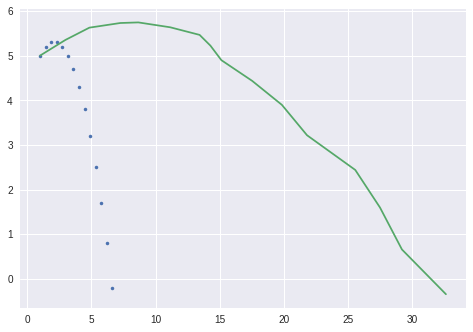

In [ ]:
X_w= [x0]
Y_w= [y0]
n = 0

while Y_w[-1]>0:
    x= vel_windy (n, theta=theta0)[0] + X_w[-1]
    y= vel_windy (n, theta=theta0)[1] + Y_w[-1]
    X_w.append (x)
    Y_w.append (y)
    n += 1

plt.plot (X, Y, '.')
# plt.plot (X1, Y1, )
plt.plot (X_w, Y_w, )

# 2D Relaxation

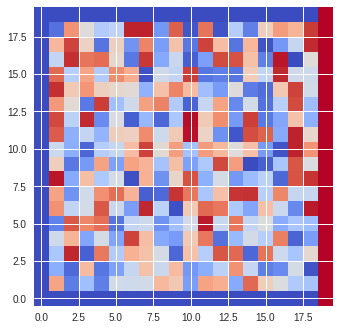

In [ ]:
N= 20
v= np.random.random ([N, N])
v[:,0]= 0
v[0,:]= 0
v[-1,:]= 0
v[:,-1]= 1
lx= len (v[0])
ly= len (v)
"""
===================
  VISUALIZE THE POTENTIAL
===================
"""      
plt.imshow (v, origin= 'lower', cmap='coolwarm')
# plt.grid ()
plt.show ()

In [ ]:
# what you should do in each step of relaxation:
i = 10
j = 11
v[i,j] = .25*(v[i+1,j] + v[i-1,j] + v[i,j+1] + v[i,j-1])

# you need 3 loops, on to repeat the steps, two for going through x and y directions: [i,j], remember to exclude the endlines from changing.

In [ ]:
"""
===================
  YOUR CODE TO RELAX THE POTENTIAL
===================
"""



#  v_result= 
"""
===================
  VISUALIZE THE POTENTIAL
===================
"""      
# # code to visualize the result:
# plt.imshow (v_result, interpolation= 'gaussian', origin= 'lower', cmap='coolwarm')
# plt.grid ()
# plt.show ()

# your result should be something like the image below:
v_result = '/content/drive/MyDrive/PYMLSpringSchool/pmlsc_WorkShop1/relaxed_sc11.png'
Image.open (v_result)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# .

**Best Regards :)**